# Trajectory of World COVID-19 Confirmed Cases

[https://github.com/aatishb/covidtrends](https://github.com/aatishb/covidtrends)

In [1]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## JHU CSSE COVID-19 Data
JHU CSSE COVID-19 Data is a daily-update open dataset operated by the Johns Hopkins University Center for Systems Science and Engineering.

![covid19-dashboard.png](covid19-dashboard.png)

https://github.com/CSSEGISandData/COVID-19

In [4]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
confirmed_cases = pd.read_csv(url)
confirmed_cases.head(20)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288
5,NaN,Antarctica,-71.949900,23.347000,0,0,0,0,0,0,...,11,11,11,11,11,11,11,11,11,11
6,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,9106,9106,9106,9106,9106,9106,9106,9106,9106,9106
7,NaN,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,...,10044125,10044125,10044125,10044125,10044125,10044125,10044957,10044957,10044957,10044957
8,NaN,Armenia,40.069100,45.038200,0,0,0,0,0,0,...,446819,446819,446819,446819,446819,446819,446819,446819,447308,447308
9,Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,0,0,...,232018,232018,232619,232619,232619,232619,232619,232619,232619,232974


## Data Preprocessing

In [7]:
confirmed_cases.drop(columns=['Lat','Long'], inplace=True)
confirmed_cases.head(20)

KeyError: "['Lat' 'Long'] not found in axis"

In [9]:
confirmed_cases = confirmed_cases.groupby('Country/Region').sum()
confirmed_cases.head(20)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
Albania,0,0,0,0,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
Algeria,0,0,0,0,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
Andorra,0,0,0,0,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
Angola,0,0,0,0,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288
Antarctica,0,0,0,0,0,0,0,0,0,0,...,11,11,11,11,11,11,11,11,11,11
Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,...,9106,9106,9106,9106,9106,9106,9106,9106,9106,9106
Argentina,0,0,0,0,0,0,0,0,0,0,...,10044125,10044125,10044125,10044125,10044125,10044125,10044957,10044957,10044957,10044957
Armenia,0,0,0,0,0,0,0,0,0,0,...,446819,446819,446819,446819,446819,446819,446819,446819,447308,447308


In [9]:
confirmed_cases.columns = pd.to_datetime(confirmed_cases.columns)
confirmed_cases.head(20)

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2023-02-28,2023-03-01,2023-03-02,2023-03-03,2023-03-04,2023-03-05,2023-03-06,2023-03-07,2023-03-08,2023-03-09
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
Albania,0,0,0,0,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
Algeria,0,0,0,0,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
Andorra,0,0,0,0,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
Angola,0,0,0,0,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288
Antarctica,0,0,0,0,0,0,0,0,0,0,...,11,11,11,11,11,11,11,11,11,11
Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,...,9106,9106,9106,9106,9106,9106,9106,9106,9106,9106
Argentina,0,0,0,0,0,0,0,0,0,0,...,10044125,10044125,10044125,10044125,10044125,10044125,10044957,10044957,10044957,10044957
Armenia,0,0,0,0,0,0,0,0,0,0,...,446819,446819,446819,446819,446819,446819,446819,446819,447308,447308


In [13]:
confirmed_cases = confirmed_cases.transpose()
confirmed_cases.index.name = 'date'
confirmed_cases.head(20)

date,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,Australia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,4,...,0,0,0,0,2,0,0,0,0,0
1/27/20,0,0,0,0,0,0,0,0,0,5,...,0,0,0,0,2,0,0,0,0,0
1/28/20,0,0,0,0,0,0,0,0,0,5,...,0,0,0,0,2,0,0,0,0,0
1/29/20,0,0,0,0,0,0,0,0,0,6,...,0,0,0,0,2,0,0,0,0,0
1/30/20,0,0,0,0,0,0,0,0,0,9,...,0,0,0,0,2,0,0,0,0,0


In [14]:
# countries to show in below, 
# please refer `confirmed_cases.columns` to find valid representation of Country/Region
countries = [
    'Taiwan*', 
    'Japan', 
    'Korea, South', 
    'US', 
    'China', 
    'Singapore'
]
confirmed_cases = confirmed_cases[countries]
confirmed_cases

date,Taiwan*,Japan,"Korea, South",US,China,Singapore
date,,,,,,
1/22/20,1,2,1,1,548,0
1/23/20,1,2,1,1,643,1
1/24/20,3,2,2,2,920,3
1/25/20,3,2,2,2,1406,3
1/26/20,4,4,3,5,2075,4
...,...,...,...,...,...,...
3/5/23,9970937,33282370,30569215,103646975,4903524,2230868
3/6/23,9970937,33286633,30581499,103655539,4903524,2230868
3/7/23,9970937,33298799,30594297,103690910,4903524,2230868


## Total Confirmed Cases

In [16]:
confirmed_cases.count()

date
Taiwan*         1143
Japan           1143
Korea, South    1143
US              1143
China           1143
Singapore       1143
dtype: int64

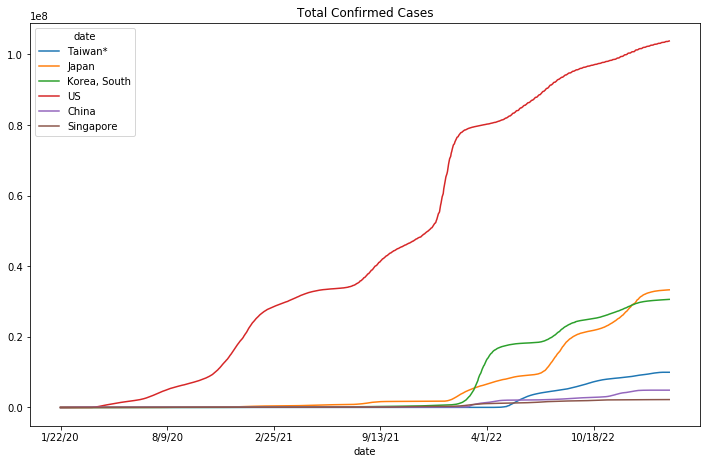

In [21]:
# pd.plot style :
# ‘line’ : 折線圖 (default)
# ‘bar’ : 柱狀圖
# ‘barh’ : 條形圖
# ‘hist’ : 直方圖
# ‘box’ : 箱型圖
# ‘kde’ : 密度圖
# ‘density’ : 同密度圖
# ‘area’ : 面積圖
# ‘pie’ : 餅圖
# ‘scatter’ : 散點圖 (DataFrame only)
# ‘hexbin’ : 六邊形箱體圖 (DataFrame only)#
figsize = (12, 12 * 2 / (1 + 5**0.5))
confirmed_cases.plot(
    figsize=figsize,
    title='Total Confirmed Cases',
)

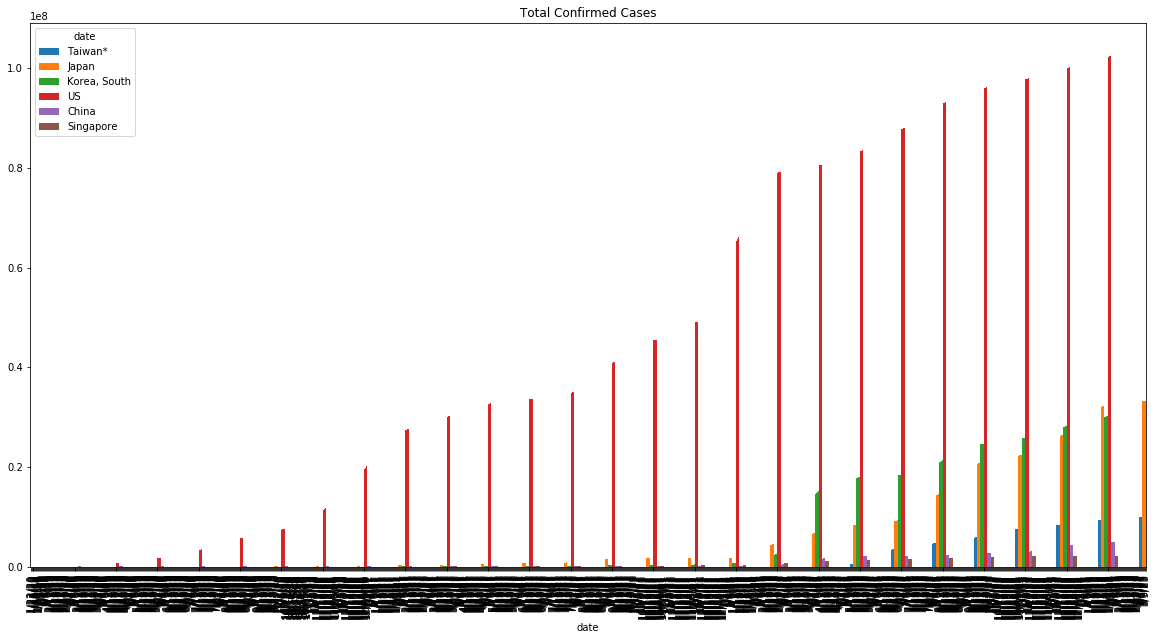

In [38]:
confirmed_cases.plot.bar(
    figsize=(20,10),
    title='Total Confirmed Cases',
)

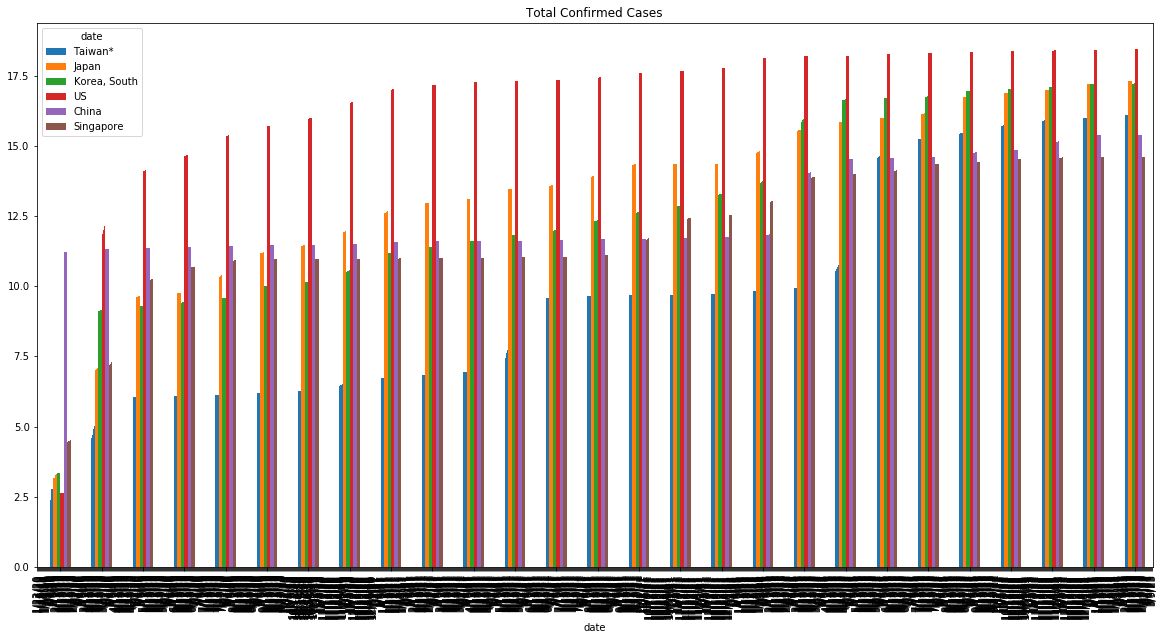

In [37]:
confirmed_cases.apply(np.log).plot.bar(
    figsize=(20,10),
    title='Total Confirmed Cases',
)

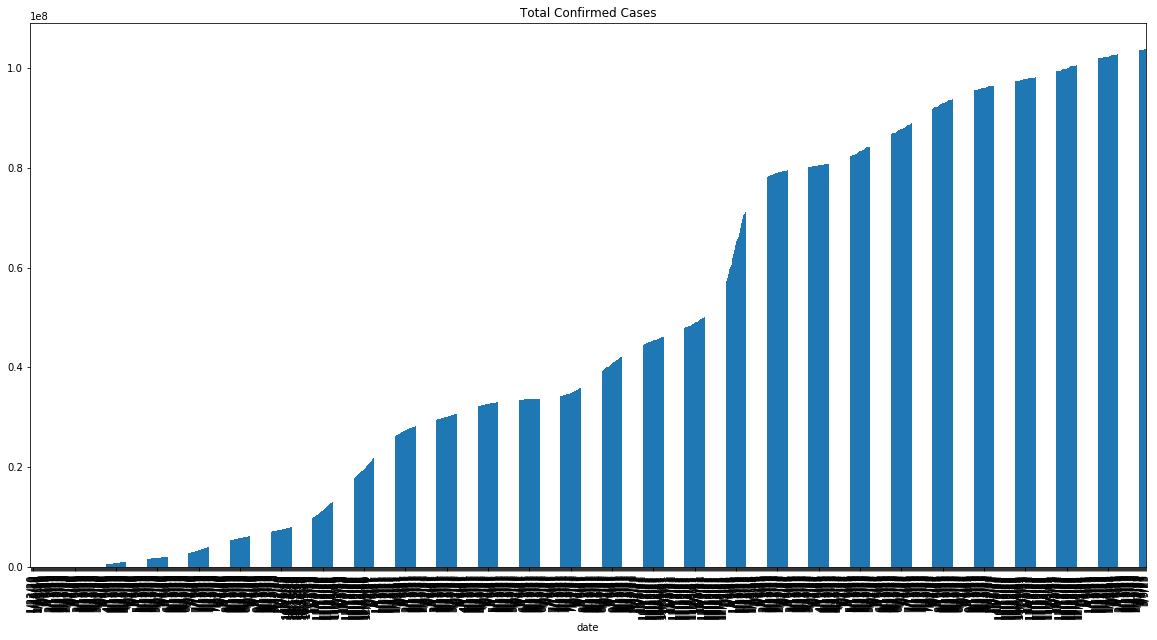

In [54]:
confirmed_cases['US'].plot.bar(
    figsize=(20,10),
    title='Total Confirmed Cases',
)

## Use a Logarithmic Scale

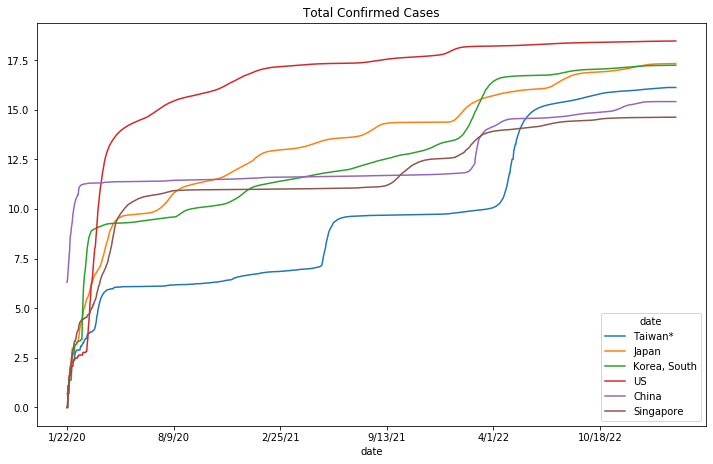

In [55]:
figsize = (12, 12 * 2 / (1 + 5**0.5))
confirmed_cases.apply(np.log).plot(
    figsize=figsize,
    title='Total Confirmed Cases',
)

## Focus on Change, Not Absolute Numbers
With logarithmic scale, we can compare cases of differnt countries. But it still hard for us to identify the situation, whether the situation is getting better. What if we focus on changes rather than absolute numbers?

In [56]:
cases_diff = confirmed_cases.diff()
cases_diff

date,Taiwan*,Japan,"Korea, South",US,China,Singapore
date,,,,,,
1/22/20,NaN,NaN,NaN,NaN,NaN,NaN
1/23/20,0.0,0.0,0.0,0.0,95.0,1.0
1/24/20,2.0,0.0,1.0,1.0,277.0,2.0
1/25/20,0.0,0.0,0.0,0.0,486.0,0.0
1/26/20,1.0,2.0,1.0,3.0,669.0,1.0
...,...,...,...,...,...,...
3/5/23,0.0,8731.0,14113.0,-3862.0,0.0,0.0
3/6/23,0.0,4263.0,12284.0,8564.0,0.0,0.0
3/7/23,0.0,12166.0,12798.0,35371.0,0.0,0.0


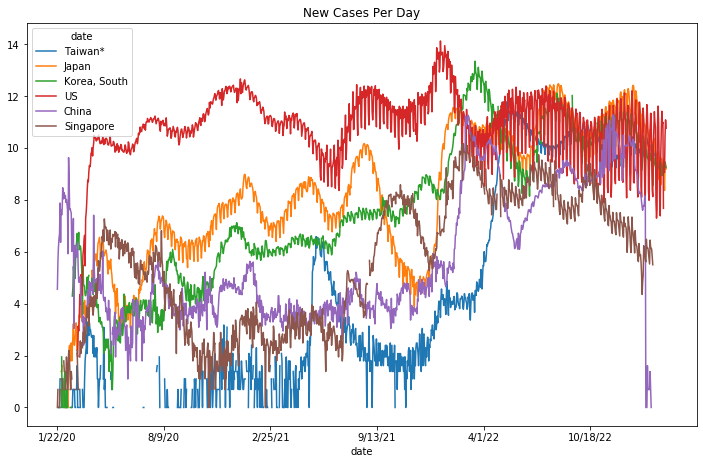

In [57]:
cases_diff.apply(np.log).plot(
    figsize=figsize,
    title='New Cases Per Day',
)

## Smooth Data Using Moving Average

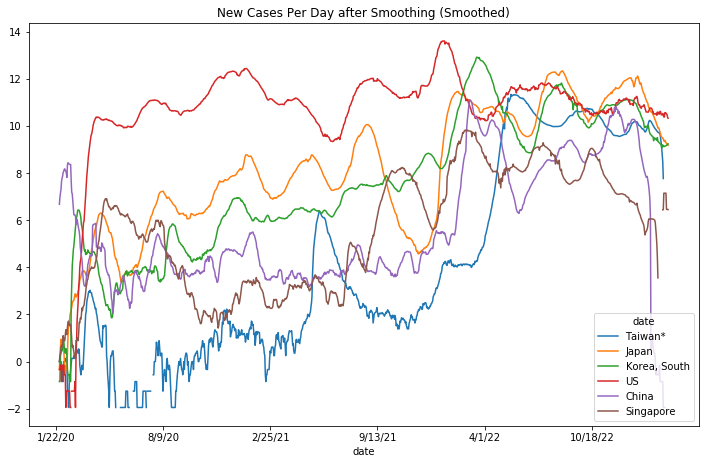

In [58]:
cases_diff = cases_diff.rolling(window=7, win_type=None).mean()
cases_diff.apply(np.log).plot(
    figsize=figsize,
    title='New Cases Per Day after Smoothing (Smoothed)',
)

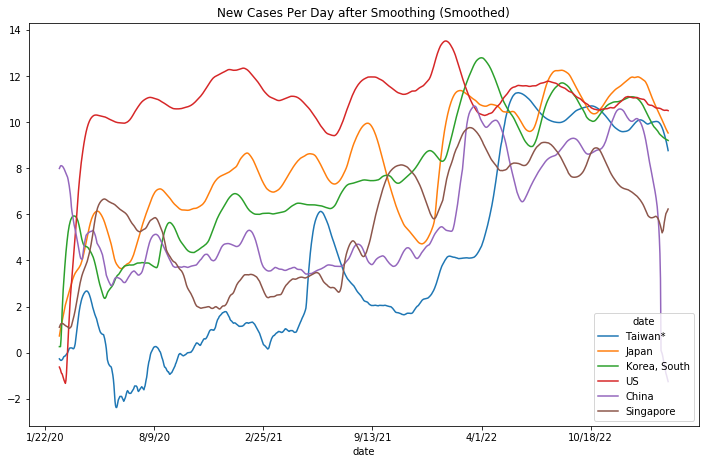

In [59]:
cases_diff = cases_diff.rolling(window=20, win_type=None).mean()
cases_diff.apply(np.log).plot(
    figsize=figsize,
    title='New Cases Per Day after Smoothing (Smoothed)',
)

## Plot Against Current Number of Infections rather than Time
Time is not the factor of virus spreading, but are current number of infections and rate of transmission.

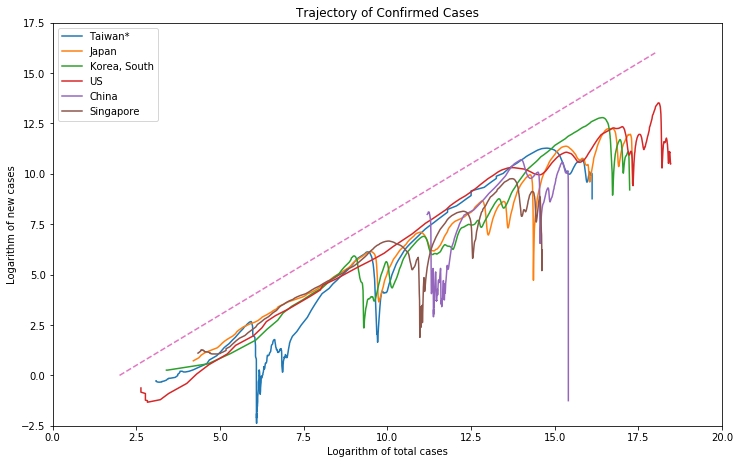

In [60]:
plt.figure(figsize=figsize)
plt.title('Trajectory of Confirmed Cases')
plt.xlabel('Logarithm of total cases')
plt.ylabel('Logarithm of new cases')
plt.xlim((0, 20))
plt.ylim((-2.5, 17.5))
for col in confirmed_cases.columns:
    plt.plot(
        confirmed_cases[col].apply(np.log), 
        cases_diff[col].apply(np.log),
        label=col,
    )
plt.plot([2,18], [0, 16], linestyle='--')
plt.legend()

## Altair: Draw Interactive Charts
https://altair-viz.github.io/gallery/index.html#example-gallery

Altair is a declarative statistical visualization library for Python, based on Vega and Vega-Lite.

Altair offers a powerful and concise visualization grammar that enables you to build a wide range of statistical visualizations quickly. Here is an example of using the Altair API to quickly visualize a dataset with an interactive scatter plot:

In [61]:
import altair as alt

# load a simple dataset as a pandas DataFrame
from vega_datasets import data
cars = data.cars()

alt.Chart(cars).mark_point().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin',
).interactive()

alt.Chart(...)

#### Homework 4  Due 5/24 (Wed.)
## 1. 比較金磚五國（BRICS）Covid19疫情的確診趨勢圖，金磚五國是指五個主要新興市場國家，分別為巴西、俄羅斯、印度、中華人民共和國、南非。
## 2.  如何使用Naïve Bayes classifier技術判斷下列表格的第八份文件(Test Document)是一份高興的文件或是不高興的文件? 指定為高興(h)文件或是不高興(~h)文件的機率各自為何?
![HW4.png](HW4.png)
